In [3]:
%load_ext autoreload
%autoreload 2

import json
from os import path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


from sklearn import preprocessing
from ONN import ONN
import threading, time

np.seterr(all='raise')

import scipy
from scipy import signal
import DataUtils as dutl

#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 5648576 

dutils = dutl.DataUtils()

In [4]:
%matplotlib widget
arr = np.array([0.00022573837340200478, 4429.906997775501])
np.power(1.0774737962681116-0.049937786342965015j, arr)

array([ 1.00001709e+000-1.04550162e-005j,
       -2.39612454e+145+3.44449700e+145j])

In [5]:
import os
cwd = os.getcwd()
print(cwd)

/home/jupyter-avinash/ranjan_env/mouse_brain_project/hopf_oscillator/Workspace


In [4]:
dutils.available_session()

Available sessions:
['estim_vis_2022-03-31_12-03-06', 'histology', 'signal_test_2022-02-08_13-19-49', 'urethane_vis_2022-04-01_10-58-41']


In [5]:
dutils.experiment_info()

Experiment type: sensory stimulation
SomnoSuite log file not found.
Body camera file not found.
Pupil camera file not found.
{'sample_rate': 500, 'num_chs': 40, 'bit_volts': 0.19499999284744263, 'units': 'uV', 'continuous': '/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/continuous/Rhythm_FPGA-101.0/continuous.dat', 'timestamps': '/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/continuous/Rhythm_FPGA-101.0/timestamps_master_clock.npy'}


In [6]:
dutils.load_data()

/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/sensory_stim_log.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
12.487579,-21.839999,-0.195000,22.619999,-41.729998,-20.279999,15.209999,-27.689999,-20.279999,-8.580000,-23.204999,-17.744999,-20.669999,-15.209999,-34.514999,-36.659999,-47.384998,-38.999999,-28.859999,-58.499998,-26.324999,-85.409997,7.605000,-61.229998,-89.894997,11.700000,-77.024997,-88.724997,14.234999,-30.224999,-69.224997
12.489579,-7.800000,27.104999,44.264998,0.000000,9.750000,42.314998,-5.850000,29.249999,38.219999,21.254999,28.664999,26.324999,25.739999,14.429999,3.900000,0.195000,-1.755000,15.404999,-18.719999,11.505000,-33.734999,50.894998,-1.560000,-32.564999,47.189998,-5.070000,-30.809999,39.194999,13.844999,-19.109999
12.491579,-1.170000,37.439999,61.229998,26.519999,49.724998,69.224997,22.424999,48.749998,57.719998,34.514999,43.094998,34.904999,36.464999,22.229999,14.624999,2.730000,-15.599999,19.304999,-45.239998,14.039999,-27.494999,76.244997,43.874998,33.344999,81.119997,49.139998,-6.630000,60.059998,32.174999,-15.404999
12.493579,22.034999,34.709999,52.259998,38.804999,45.629998,62.789998,28.664999,52.454998,62.009998,33.929999,50.699998,44.654998,48.359998,37.244999,28.274999,11.700000,-12.285000,27.884999,-42.314998,13.649999,-23.984999,78.584997,62.204998,38.219999,82.484997,67.859998,-3.315000,59.669998,45.629998,-4.875000
12.495579,22.814999,27.104999,44.264998,46.019998,53.039998,58.499998,23.399999,54.014998,62.789998,30.809999,54.794998,44.069998,62.789998,48.944998,38.024999,24.374999,2.730000,45.629998,1.755000,52.064998,24.179999,78.779997,78.974997,49.334998,72.734997,70.979997,15.794999,50.504998,50.114998,-1.950000


In [14]:
dutils.eegdata.to_csv("mouse_599975_continuous.csv")

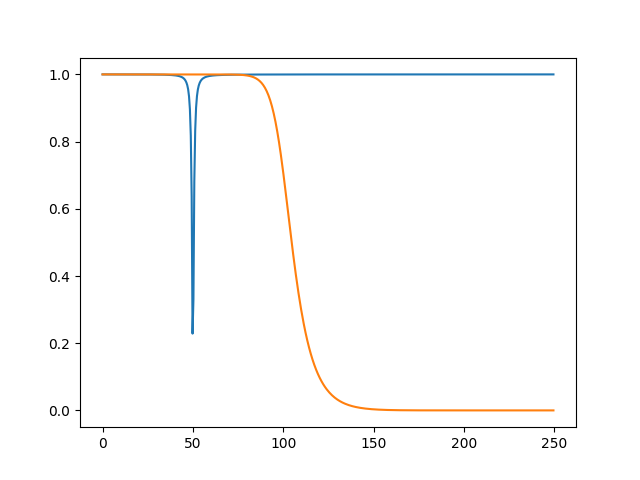

In [7]:
dutils.filter_data()

In [8]:
dutils.preprocess_data()

dict_keys([(0, 'biphasic', '30'), (0, 'biphasic', '50'), (0, 'biphasic', '70'), (0, 'circle', 'white'), (1, 'biphasic', '30'), (1, 'biphasic', '50'), (1, 'biphasic', '70'), (1, 'circle', 'white')])


,stim_type,parameter,onset,offset,duration,sweep
0,biphasic,30,313.17998,313.18038,0.00040,0
1,biphasic,30,317.04933,317.04973,0.00040,0
2,biphasic,50,321.01047,321.01087,0.00040,0
3,biphasic,70,325.49254,325.49294,0.00040,0
4,biphasic,70,329.14937,329.14977,0.00040,0
...,...,...,...,...,...,...
955,circle,white,5260.03320,5260.28254,0.24934,1
956,circle,white,5264.48693,5264.73626,0.24933,1
957,circle,white,5268.64042,5268.90643,0.26601,1
958,circle,white,5273.11081,5273.36016,0.24935,1


No. of eeg data segments:  960
(4776.24567, 4779.24567]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
4776.246935,69.462516,45.932395,38.619619,22.184201,32.875677,46.602022,37.105831,28.947819,33.659630,19.362389,20.739168,-1.822933,-22.880615,2.778434,-14.686730,-35.862375,-56.922811,-51.696736,-105.386232,-16.706713,-17.507430,45.843811,106.031349,136.742967,61.988859,188.039792,195.424575,61.143129,133.842144,171.883521
4776.248935,80.897285,50.585056,45.088260,49.397855,66.960557,62.539411,105.553830,76.499084,56.291121,90.132577,66.118698,32.194715,-17.180875,27.168907,-13.257953,-40.918160,-62.232277,-53.577771,-115.243563,-23.052633,-40.857155,44.535706,95.361336,125.288731,61.647003,179.319244,196.087234,62.292355,130.482748,175.214209
4776.250935,89.325453,53.875117,52.000035,82.052407,102.363973,81.552949,159.219199,120.828776,85.102654,138.041564,109.434916,73.545240,8.793066,58.326290,4.478428,-25.516184,-46.669975,-27.700858,-91.791404,-2.958859,-37.262140,56.569070,91.347115,114.329935,69.663991,167.233692,185.703822,66.023092,126.962150,170.086981
4776.252935,92.551497,56.717172,59.018812,111.825940,131.565092,99.837262,188.765752,153.725000,113.751718,162.048674,143.581114,110.300929,43.975899,87.931538,28.983047,-1.002252,-21.097409,10.929948,-47.998232,34.692688,-7.684896,76.446301,87.664884,98.630301,82.404554,138.958742,155.042472,72.227311,123.333232,153.259692
4776.254935,89.940036,59.590992,64.032653,129.820859,149.815748,111.745717,198.069370,171.523887,133.110060,171.756027,164.359219,132.695079,72.069659,108.790676,48.031521,18.496707,0.825258,42.443908,-3.432232,70.097131,24.535102,91.614656,80.335475,78.695919,90.970847,99.147945,110.911563,76.653321,116.098252,125.546928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779.236999,37.994870,-1.342696,-15.751418,48.981895,67.819127,11.397175,65.294635,55.551382,39.726086,58.388023,62.725723,58.307464,72.514106,64.841218,94.366157,112.554578,134.820605,88.561291,125.999087,51.615884,79.435148,-12.978925,5.028556,24.711235,-26.690771,-19.027862,28.538280,-33.559182,-8.553992,40.734101
4779.238999,33.251519,-3.960510,-17.801031,40.499323,56.535765,5.382789,61.859533,47.468995,29.471275,48.942842,51.423570,43.553112,59.740287,49.481100,83.228055,106.896855,143.204986,82.861916,140.857263,54.009550,92.992628,-17.608285,2.926185,27.731830,-30.338415,-31.074635,24.684438,-37.156156,-13.533532,39.237752
4779.240999,29.399220,-6.512780,-19.259652,27.058338,41.225889,-2.676397,55.591111,36.064173,15.961846,36.946394,35.694691,23.799601,40.171641,29.086382,65.811076,94.237757,143.269780,68.475965,147.074868,50.453676,100.532104,-24.495395,-0.411654,28.032713,-33.480506,-38.878764,17.798816,-38.592754,-15.626669,36.418217
4779.242999,25.065784,-9.054518,-20.826790,7.494710,23.388001,-11.854717,45.438208,21.683455,1.829295,23.707173,18.022612,1.873450,15.931589,6.172206,41.102323,71.913472,130.647058,45.592137,139.327412,37.796301,97.176047,-33.859054,-6.937656,24.155790,-37.270395,-42.162199,13.604400,-37.804532,-14.328308,35.710231


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
4776.246935,9.856797,0.460899,-3.872864,14.640728,14.995744,1.747716,14.444038,12.600355,7.399322,12.978351,13.129633,11.562732,5.040585,13.052597,5.054244,1.401181,-0.537592,1.389061,-2.080675,-3.919086,-4.037144,-2.920144,-2.732600,-1.588730,-4.688527,-2.565082,-0.609600,-5.485722,-2.392540,0.359425
4776.248935,9.830527,1.118570,-2.825645,15.537205,16.188213,3.352384,14.789871,13.636594,9.082474,13.423054,13.990221,12.605950,6.591773,14.282166,6.387639,2.883028,1.275566,3.189172,0.419393,-0.256332,-0.695890,-0.163017,1.193716,2.180464,-2.217419,2.230183,2.198216,-4.140556,-0.687132,1.825049
4776.250935,8.606659,1.380195,-2.004320,15.128050,16.024198,4.261045,13.975958,13.322312,9.634487,12.403749,13.366572,11.911921,7.420195,14.208173,7.155408,4.275820,3.429188,4.595658,2.834012,2.849914,2.525210,1.912272,4.606736,5.418862,-0.278939,6.045365,4.672617,-2.965733,0.639793,3.284871
4776.252935,7.127844,1.226816,-1.628830,13.722931,14.842179,4.302828,12.773266,12.158554,9.121234,11.069401,12.046459,10.373966,7.450439,13.254897,7.285014,5.034571,4.752273,5.159547,4.264579,4.665871,5.185087,2.803851,6.728603,7.500284,0.630203,8.015521,6.483532,-2.229763,1.360172,4.305368
4776.254935,6.132712,0.780751,-1.814081,12.042897,13.349681,3.615646,12.142197,11.016968,8.025849,10.703553,11.094310,9.384873,6.956427,12.138795,6.911527,4.816535,4.471397,4.830900,4.444581,5.072244,7.016736,2.525330,7.163014,8.025953,0.422185,8.062827,7.014440,-2.222018,1.258855,4.339981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779.236999,-1.757371,-3.652004,-3.666205,-2.800613,-2.626786,-4.509143,-2.794266,-3.458697,-4.177222,-3.599631,-3.605376,-2.804400,-3.738967,-1.623133,-0.696020,-0.812316,-1.960506,-3.726536,-3.869741,-5.822282,-7.383274,-5.572901,-5.277428,-4.426517,-4.718149,-3.567162,-0.514865,-2.979990,-1.141335,1.789769
4779.238999,-1.313816,-3.707706,-4.042338,-1.489268,-1.581698,-4.550789,-2.445853,-2.828571,-3.929554,-3.140106,-2.868496,-1.888663,-3.514822,-0.305612,0.006065,-0.167736,-1.045523,-3.445428,-2.843225,-6.197300,-7.486879,-6.452622,-6.084697,-4.428405,-5.292933,-4.320968,-0.052230,-3.459519,-1.381817,1.764434
4779.240999,-0.586562,-3.530016,-4.354108,-0.366349,-0.387587,-4.770822,-1.654488,-2.067730,-3.735031,-2.592675,-2.270838,-1.282809,-3.484401,1.067457,0.570637,-0.027976,-1.082293,-3.656662,-2.656890,-6.451633,-6.448601,-7.485870,-6.275942,-3.656771,-6.108062,-4.134978,0.246233,-3.956053,-1.455641,1.719874
4779.242999,0.260927,-3.178458,-4.490183,0.637029,0.972111,-4.935512,-0.135436,-0.967960,-3.404164,-1.610731,-1.524327,-0.851460,-3.500654,2.381599,0.905164,-0.345791,-1.807781,-4.168457,-3.173037,-6.588554,-4.809320,-8.336672,-5.967477,-2.487071,-6.874739,-3.655885,0.403772,-4.254515,-1.387001,1.675987


(1500,)


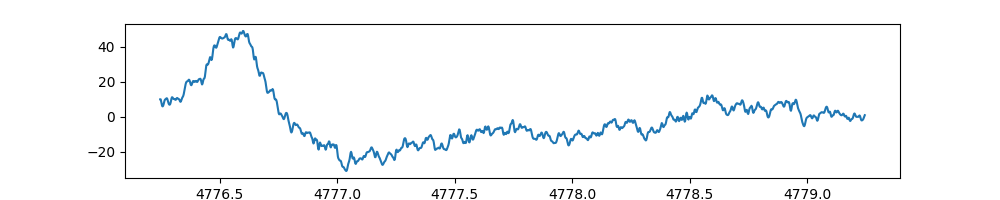

In [10]:
#Use processed data instead of eeg data
#time = processedData.index
#C1 = processedData.iloc[:,0]
time = dutils.segmented_data.index
C1 = dutils.segmented_data.iloc[:,0]
time = dutils.ERP.index#[0:1500]
C1 = dutils.ERP.iloc[0:1500,0]

time = np.array(time)#[0:1000]
C1 = np.array(C1)#[0:1000]
print(C1.shape)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.plot(time, C1)

In [48]:
#Scale between -1 and 1
scalar = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaled_data = scalar.fit_transform(C1[:,None])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.plot(time, scaled_data)
plt.xlabel("time")
plt.ylabel("amplitude")

NameError: name 'C1' is not defined

Cut-off frequency 100
Initial theta 
 [[ 0.          0.388772   -2.03307661 -2.14531979  0.20862623  1.73236207
   2.06832511  1.54440151  2.37032966  3.10418206  0.50373032  5.16572192]
 [-0.388772    0.          1.2263032   2.41126547  1.40441227 -0.31642349
   5.38103316 -0.51649976  2.08853414 -3.54783749 -0.3130123   0.86074982]
 [ 2.03307661 -1.2263032   0.          0.75860868 -1.18776336 -1.14203219
   1.01702063 -5.21250596  1.2790742  -2.35415275  1.92340774 -0.51429548]
 [ 2.14531979 -2.41126547 -0.75860868  0.          4.63202077  2.94973597
   4.25065227  3.17023623 -1.05784126  3.70525351 -2.51968553  4.41610693]
 [-0.20862623 -1.40441227  1.18776336 -4.63202077  0.          3.01442901
   0.76969291  0.1943499  -2.18479772 -0.24740728  2.91757966  1.28999946]
 [-1.73236207  0.31642349  1.14203219 -2.94973597 -3.01442901  0.
   0.45647919  1.70878987 -0.81099419 -0.68300353  1.75425639  4.03070159]
 [-2.06832511 -5.38103316 -1.01702063 -4.25065227 -0.76969291 -0.45647919
  

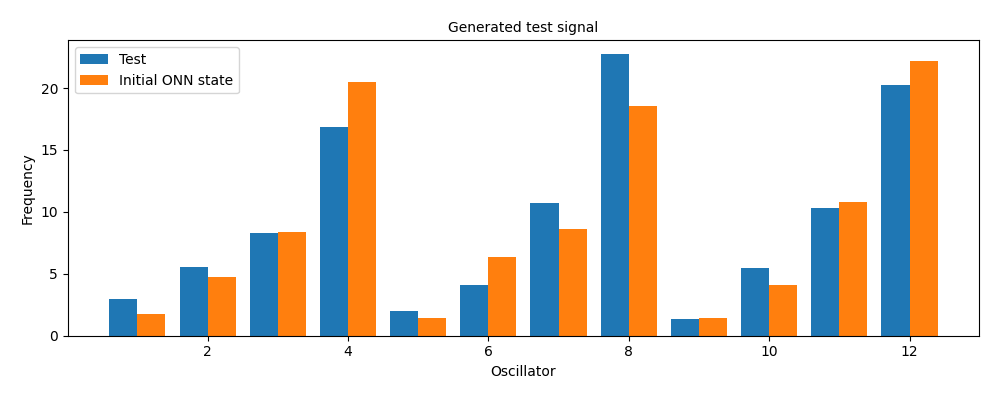

(500000, 1)


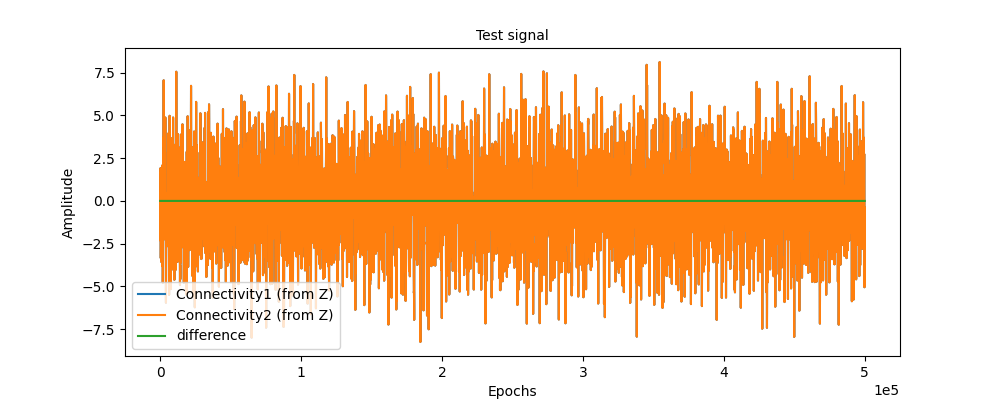

In [33]:
print("Cut-off frequency", dutils.LPF_FC)
o = ONN(N=3, NEPOCHS=200, fc=dutils.LPF_FC)

vald_signal = o.generate_test_samples(NSAMPLES=500000)
vald_signal2 = o.generate_test_samples2(NSAMPLES=500000)
#vald_signal = o.generate_test_samples()
#vald_signal = o.generate_test_signal()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.bar(np.linspace(1, o.N, o.N)-0.2, o.OMEGA_Test.flatten(), 0.4, label="Test")
plt.bar(np.linspace(1, o.N, o.N)+0.2, o.OMEGA.flatten(), 0.4, label="Initial ONN state")
plt.xlabel("Oscillator")
plt.ylabel("Frequency")
plt.title("Generated test signal")
plt.legend()
f.tight_layout()
plt.show()

print(vald_signal.shape)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.plot(np.linspace(1, len(vald_signal), len(vald_signal)), vald_signal, label="Connectivity1 (from Z)")
plt.plot(np.linspace(1, len(vald_signal2), len(vald_signal2)), vald_signal2, label="Connectivity2 (from Z)")
#plt.plot(np.linspace(1, len(signal_), len(signal_)), signal_, label="standard cos generation")
#plt.plot(np.linspace(1, len(vald_signal_), len(vald_signal_)), vald_signal_, label="without coupling")
plt.plot(np.linspace(1, len(vald_signal), len(vald_signal)), vald_signal2 - vald_signal, label="difference")
plt.xlabel("Epochs")
plt.ylabel("Amplitude")
plt.title("Test signal")
plt.legend()
plt.show()

#!!!
#Overriding scaled data and time
#!!!
scalar = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaled_data = vald_signal #scalar.fit_transform(vald_signal) #scalar.fit_transform(vald_signal) #vald_signal #scalar.fit_transform(signal)
time = np.linspace(1, len(scaled_data), len(scaled_data))

#display(o.OMEGA)
#display(o.OMEGA_Test)
#display(o.THETA)
#display(o.THETA_Test)
#display(o.J)
#display(o.J_Test)

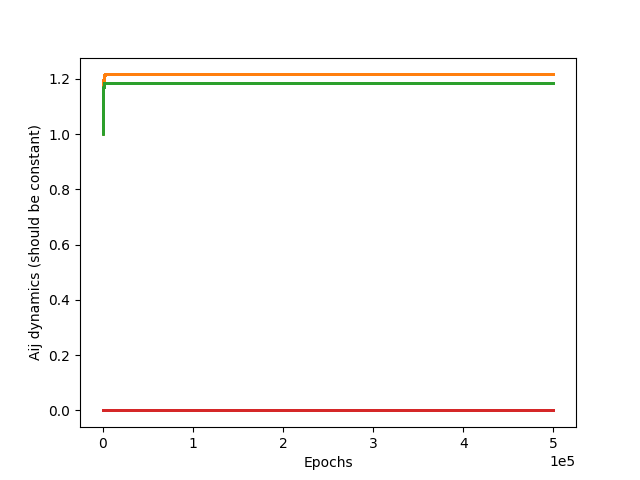

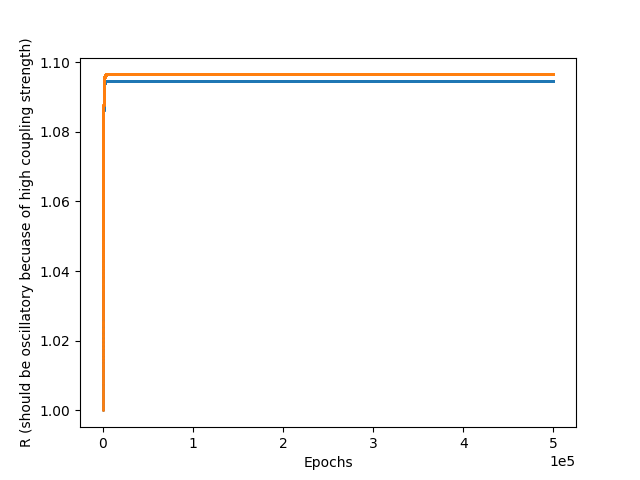

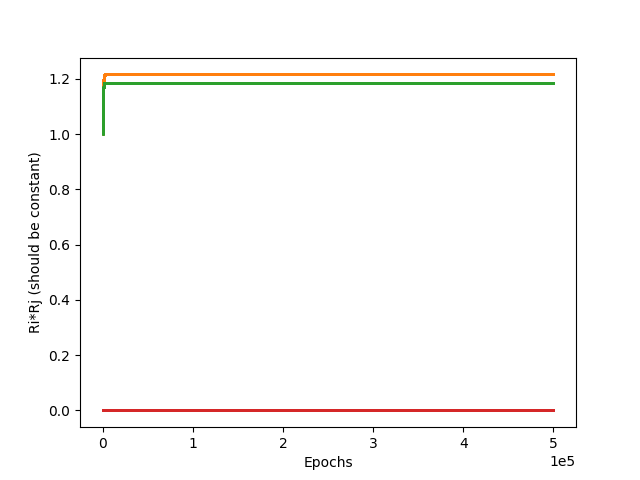

In [63]:
epochs = np.linspace(1, 500000, 500000)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Aij dynamics (should be constant)")
for i in range(o.N):
    for j in range(o.N):
        plt.scatter(epochs, o.bin_conn[i][j]*o.td5[i][j], s=0.5) #linewidth=1
plt.show()

f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("R (should be oscillatory becuase of high coupling strength)")
for i in range(o.N):
    plt.scatter(epochs, o.td6[0,i], s=0.5) #linewidth=1
plt.show()

f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Ri*Rj (should be constant)")
for i in range(o.N):
    for j in range(o.N):
        plt.scatter(epochs, o.bin_conn[i][j]*o.td7[i][j], s=0.5) #linewidth=1
plt.show()

# display((o.td1[:,:,500000-500000]))
# display(np.sin(o.td2[:,500000-500000]))

# epochs = np.linspace(1, 500000, 500000)
# f = plt.figure()
# plt.xlabel("Epochs")
# plt.ylabel("Normalized phase difference")
# for i in range(o.N):
#     for j in range(o.N):
#         plt.scatter(epochs, np.sin(o.td1[i][j]), s=0.5) #linewidth=1
# plt.show()

# #f = plt.figure()
# #plt.ylabel("PHI_COUPLED")
# #for i in range(o.N):
# #    plt.scatter(epochs, o.td2[i], s=0.5) #linewidth=1
# #plt.show()


# f = plt.figure()
# plt.ylabel("R_")
# print(o.td3.T.shape)
# for i in range(o.N):
#     plt.scatter(epochs, o.td3[i].flatten(), s=0.5) #linewidth=1
# plt.show()

# f = plt.figure()
# print(o.td4.shape)
# plt.ylabel("PHI_")
# for i in range(o.N):
#     plt.scatter(epochs, o.td4[i].flatten(), s=0.5) #linewidth=1
# plt.show()


In [35]:
def Run():
    #o.fit(scaled_data, sampling_rate=500) #For EEG
    o.fit(scaled_data, sampling_rate=1000) #For Test
#th1 = threading.Thread(target=Run).start()
o.initialize()
o.fit(scaled_data, sampling_rate=1000)
#o.train_frequency(scaled_data, sampling_rate=1000)

/home/jupyter-avinash/ranjan_env/mouse_brain_project/hopf_oscillator/Workspace/ONN.py:214: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  J = np.array(nx.adjacency_matrix(G).todense())


Initial theta 
 [[ 0.         -4.31425968 -1.46329793 -2.76517715 -3.12075849 -3.31040281
  -3.79630064  1.16104627  0.29281675  3.07001851  5.45965564 -3.20934028]
 [ 4.31425968  0.         -3.53773109  4.4724053   5.40027665 -1.77738458
  -0.4982845  -2.63226278  1.04181526 -1.03088458  0.0975967  -2.69057494]
 [ 1.46329793  3.53773109  0.         -3.4429104   3.35243278  4.81866745
  -0.87420588  3.68944145  2.84102479 -1.79638025 -3.12208169 -4.60834725]
 [ 2.76517715 -4.4724053   3.4429104   0.          3.92566679  1.02655406
  -1.45993056  0.49140548 -0.9854807  -1.58068931 -1.47343786 -0.34299769]
 [ 3.12075849 -5.40027665 -3.35243278 -3.92566679  0.          1.9568541
  -1.99329388  2.02274046  1.87413636  2.29940824 -2.17425945  0.80984722]
 [ 3.31040281  1.77738458 -4.81866745 -1.02655406 -1.9568541   0.
  -0.49947432  2.60527053 -1.398387    0.98463494 -0.92680233 -2.42871642]
 [ 3.79630064  0.4982845   0.87420588  1.45993056  1.99329388  0.49947432
   0.          1.66020775

In [32]:
#%debug
display(o.R)
#Problem with 6th and 18th oscillator
#1. OMEGA looks okay
#2. R is okay

#COMPLEX_W =  o.dCOMPLEX_W/10000
#COMPLEX_W = o.J*np.exp(1j*o.THETA/o.OMEGA.T) + o.dCOMPLEX_W/10000
#Identify location
#val = np.zeros(o.N)
# for num in o.dCOMPLEX_W:
#     print(num)
#     num/10000
#     val = num
#     #np.angle(num)

#R is so high in below problem
#np.absolute(o.Z_CMPLX)


array([[  1.91399729],
       [100.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [100.        ]])

In [255]:
val
np.around(val, decimals=2)

array([5.14613964e+158+0.j, 5.14613964e+158+0.j, 5.14613964e+158+0.j,
       5.14613964e+158+0.j, 5.14613964e+158+0.j, 5.14613964e+158+0.j,
       5.14613964e+158+0.j, 5.14613964e+158+0.j, 5.14613964e+158+0.j,
       5.14613964e+158+0.j, 5.14613964e+158+0.j, 5.14613964e+158+0.j,
       5.14613964e+158+0.j, 5.14613964e+158+0.j, 5.14613964e+158+0.j,
       5.14613964e+158+0.j, 5.14613964e+158+0.j, 5.14613964e+158+0.j])

In [8]:
#o.OMEGA = [] #Run to stop thread
o.progress
#dutils.show_inter_region_connectivity()
#print(o.OMEGA_VERBOSE_.shape)

100.0

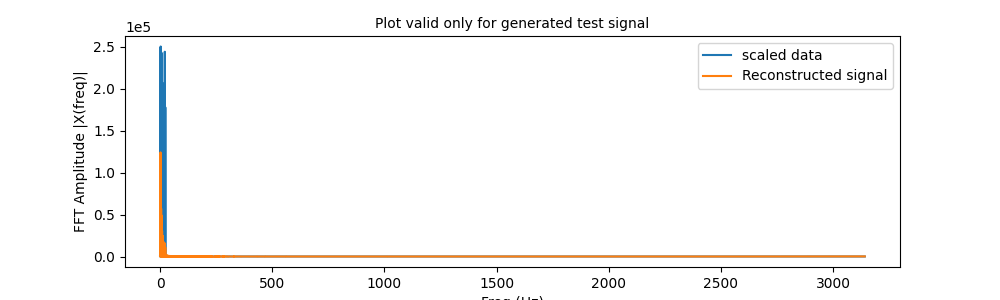

In [36]:
X, f_oneside_X = o.find_fft(scaled_data[:,0], 1000)
Z, f_oneside_Z = o.find_fft(o.SIG_, o.sampling_rate)
#W, f_oneside_W = o.find_fft(o.ERR_SIG_[o.NEPOCHS-1,:], o.sampling_rate)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
#plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.plot(f_oneside_X, X, label="scaled data")
#plt.plot(f_oneside, np.abs(Y[:n_oneside]), label="Actual signal")
plt.plot(f_oneside_Z, Z, label="Reconstructed signal")
#plt.plot(f_oneside_W, W, label="Error Signal")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("Test signal")
plt.title("Plot valid only for generated test signal")
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(1, 300)
plt.legend()

#remove 50Hz, LPF 150
#Wait for all value sto go to steady state and then cmpare the magnitude spectrum

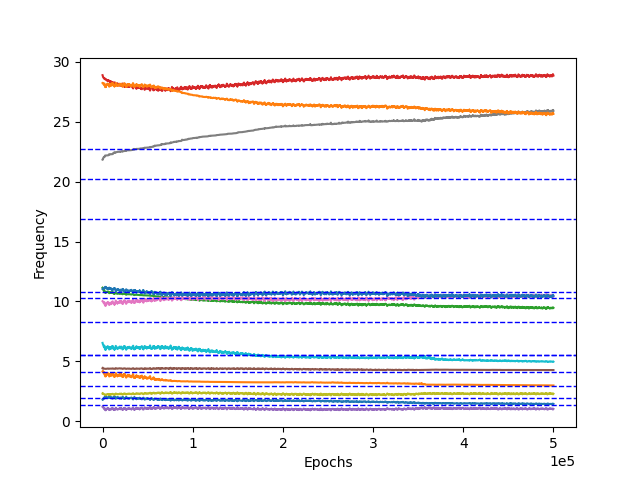

In [37]:
"""
Frequency details. Note: OMEGA is just a constant and might not neecessarily be equal to phi
"""
epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Frequency")
for i in range(len(o.OMEGA_)):
    plt.plot(epochs, o.OMEGA_[i])
for i in range(len(o.OMEGA_Test)):
    plt.axhline(y=o.OMEGA_Test[i], color='b', linestyle='--', linewidth=1)
plt.show()

No handles with labels found to put in legend.


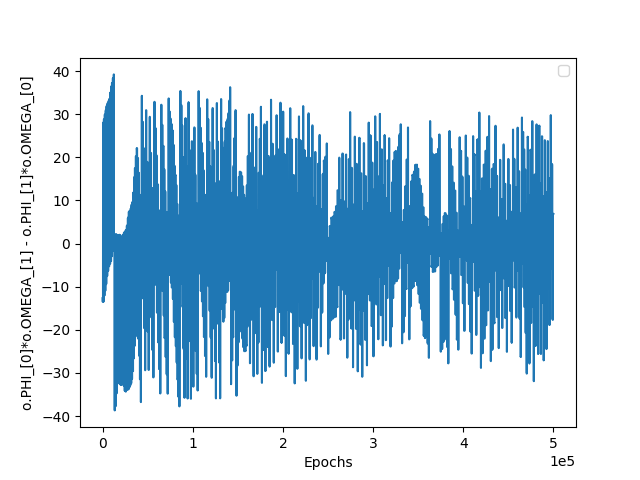

[[   0.         -286.6256258   -93.73632057  -51.79419312 -203.48889729
  -258.64278931 -270.5420177  -139.63430515  -86.76302113 -318.08703627
  -389.89837805 -105.53060411   24.08366402 -437.16221129 -503.70660241
  -370.70864102 -111.40648041 -257.48326615 -175.79284891 -210.44863917]
 [  48.44085057    0.         -317.04743193  139.40782237 -212.07606553
  -330.69653528 -477.01591274  -92.07336061 -251.58919178 -138.17596886
  -382.87779396 -330.62902538  -79.55642376 -188.88404155 -308.96020195
  -144.89803103  -35.64937565  -15.23374792 -243.90850356 -232.46307982]
 [-386.55818684 -150.45236293    0.           59.01703671 -208.79297925
    12.48113927 -279.32557516 -247.83210335 -374.19108613 -283.1758044
  -348.56303093 -465.07879962 -182.22976592 -497.57757509 -358.60254867
  -453.6509312  -103.72026434 -271.77665537 -145.28755127 -364.0802155 ]
 [-265.64603576 -264.29510172 -380.48506185    0.         -304.80757984
  -164.21541595 -337.90523786 -249.86758233 -251.4742762   -38

In [14]:
#Note: PHI is important and gives indication of frequency and not the omega itself
epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("o.PHI_[0]*o.OMEGA_[1] - o.PHI_[1]*o.OMEGA_[0]")
#for i in range(len(o.PHI)):
#    plt.scatter(epochs, np.sin(o.PHI_[i]), s=0.4)
#This term should be constant
plt.plot(epochs, o.PHI_[0]*o.OMEGA_[1] - o.PHI_[1]*o.OMEGA_[0])
plt.legend()
plt.show()
print(o.THETA)

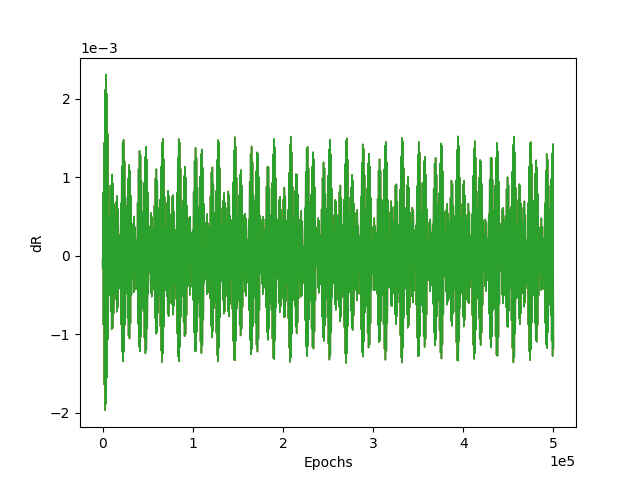

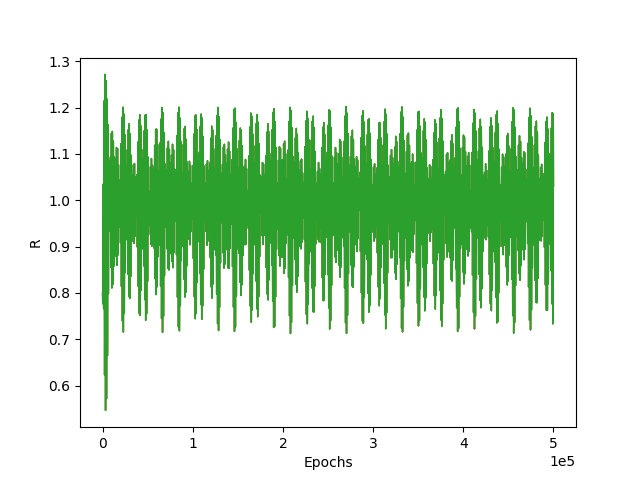

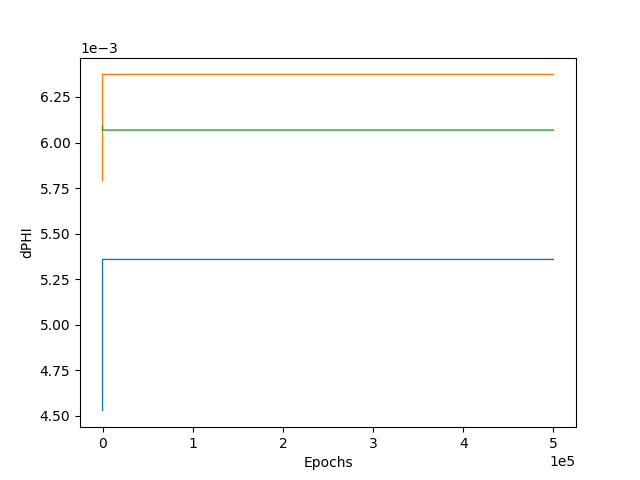

In [49]:
"""
dR and dPHI
dR is zero, dPHI is periodic (not expected)
"""
epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("dR")
for i in range(len(o.dR_)):
    plt.plot(epochs, o.dR_[i], linewidth=1, label="Oscillator amplitude (R)"+str(i))
    #plt.plot(epochs, o.R_CPL_[i], linewidth=1, label="Coupling (R_CPL)"+str(i))
#plt.legend()
plt.show()

epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("R")
for i in range(len(o.R_)):
    plt.plot(epochs, o.R_[i], linewidth=1, label="Oscillator amplitude (R)" + str(i))
#plt.legend()
plt.show()

epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("dPHI")
for i in range(len(o.dPHI_)):
    plt.plot(epochs, o.dPHI_[i], linewidth=1)
    #plt.plot(epochs, o.PHI_CPL_[i], linewidth=1, label="Coupling (PHI_CPL)")
#plt.legend()
plt.show()

# epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
# f = plt.figure()
# plt.xlabel("Epochs")
# plt.ylabel("dOMEGA_")
# for i in range(len(o.dOMEGA_)):
#     plt.plot(epochs, o.dOMEGA_[i], linewidth=1)
#     #plt.plot(epochs, o.PHI_CPL_[i], linewidth=1, label="Coupling (PHI_CPL)")
# plt.legend()
# plt.show()

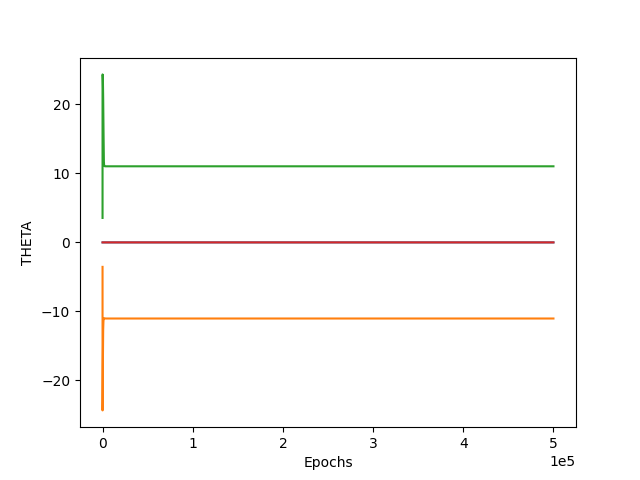

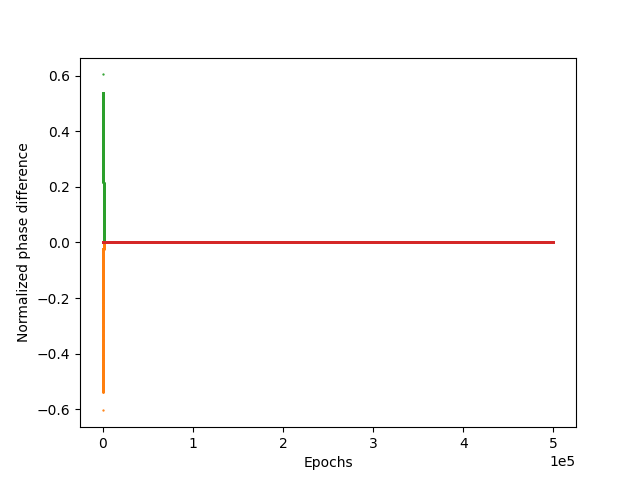

In [41]:
"""
THETA details (Display normalized pahse difference instead)
THETA(IJ) should be symmetric
Consider these connection only for connected pair
"""
bin_conn = np.zeros([o.N, o.N])
bin_conn[o.J > 0] = 1

epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("THETA")
for i in range(o.N):
    for j in range(o.N):
        plt.plot(epochs, o.THETA_[i][j])
plt.show()

"""
Normalized phase difference should be zero at steady state
Is this way of calculating NPD correct? PHI dot can be different from OMEGA (yes most likely)
"""
epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Normalized phase difference")
for i in range(o.N):
    for j in range(o.N):
        plt.scatter(epochs, o.NORM_PHASE_DIFF_[i][j], s=0.4) #linewidth=1
plt.show()


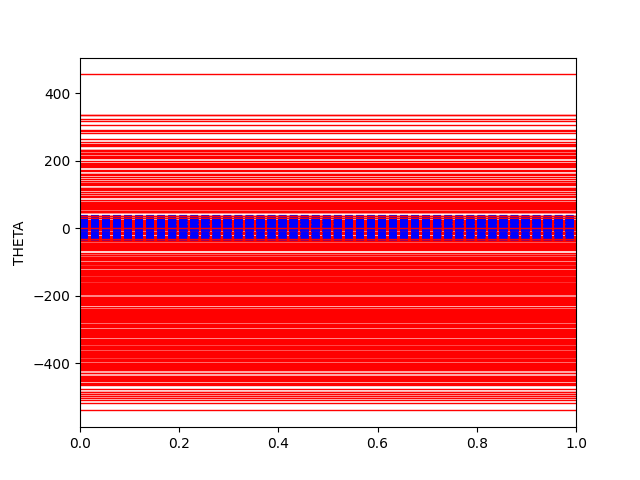

In [15]:
f = plt.figure()
for i in range(o.N):
    for j in range(o.N):
        plt.axhline(y=o.THETA_Test[i][j], color='b', linestyle='--', label="test signal")
        plt.axhline(y=o.THETA[i][j], color='r', linewidth=1, label="reconstructed")
plt.ylabel("THETA")
#plt.legend()
plt.show()

# print("Test theta: \n", o.THETA_Test)
# print("Theta: \n", o.THETA)
# print("PHI: \n", o.PHI)
# print("OMEGA: \n", o.OMEGA)
# INT_MAT = (o.PHI*o.OMEGA.T - o.PHI.T*o.OMEGA - o.THETA)/(np.pi*o.OMEGA.T)
# print("THETA recalculated: \n", INT_MAT)

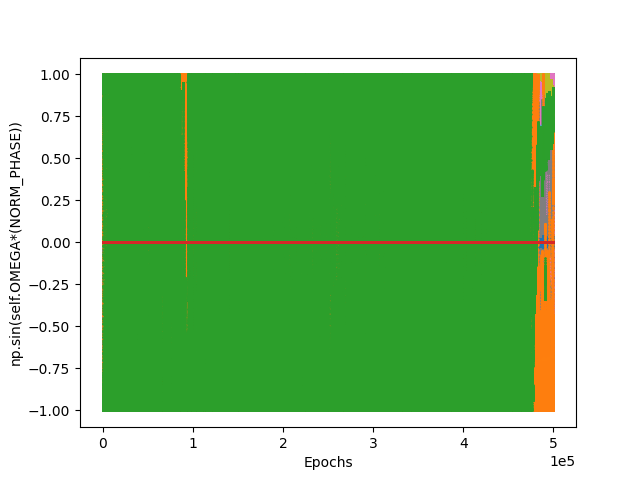

In [28]:
bin_conn = np.zeros([o.N, o.N])
bin_conn[o.J > 0] = 1

epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("np.sin(self.OMEGA*(NORM_PHASE))")
for i in range(o.N):
    for j in range(o.N):
        #Entries here should be zero
        plt.scatter(epochs, bin_conn[i][j]*o.dW_[i][j], s=0.4)
plt.show()

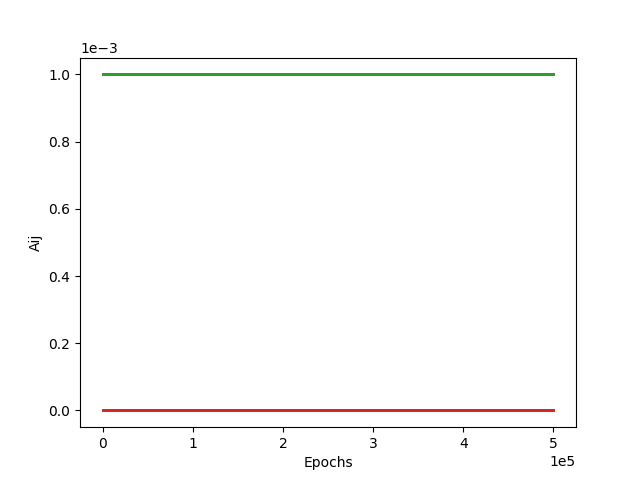

In [11]:
"""
THETA details (Display normalized pahse difference instead)
THETA(IJ) should be symmetric
Consider these connection only for connected pair
"""

epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Aij")
for i in range(o.N):
    for j in range(o.N):
        #Entries here should be zero
        plt.scatter(epochs, o.bin_conn[i][j]*o.J_[i][j], s=0.4)
plt.show()

In [24]:
X = np.fft.fft(o.SIG_[o.NEPOCHS-1])
N = len(X)
print(N)
n = np.arange(int(N/2))
T = N/o.sampling_rate
freq = n/T
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
#plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.plot(f_oneside, np.abs(X[:n_oneside]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("Reconstructed signal")
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(1, 300)

#remove 50Hz, LPF 150

IndexError: tuple index out of range

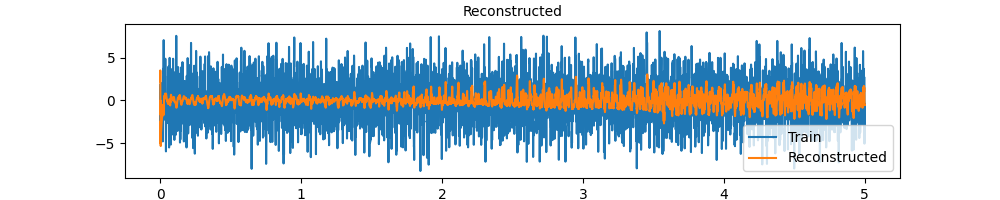

In [38]:
#TODO: Try exponenial distribution for amplitudes

#scalar = preprocessing.MinMaxScaler()
#scaled_data = scalar.fit_transform(C1[:,None])
epochs = np.linspace(1, o.NSAMPLES, o.NSAMPLES)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("Train")
plt.plot(epochs, scaled_data.flatten(), label="Train")

data = o.SIG_
plt.title("Reconstructed")
plt.plot(epochs, data.flatten(), label="Reconstructed")
plt.legend()

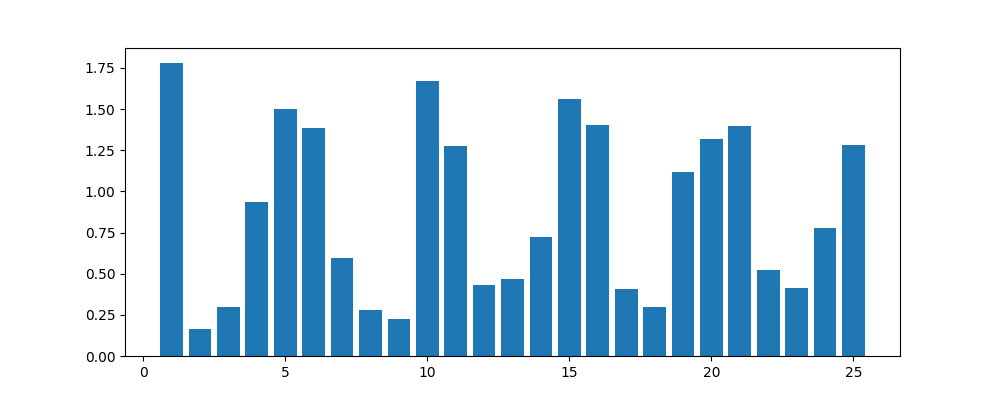

In [18]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.bar(np.linspace(1, o.N, o.N), o.OMEGA_[:,0] - o.OMEGA_[:,o.NSAMPLES])
plt.show()
#Difference is mostly positive - oscillators still favoring lower frequencies

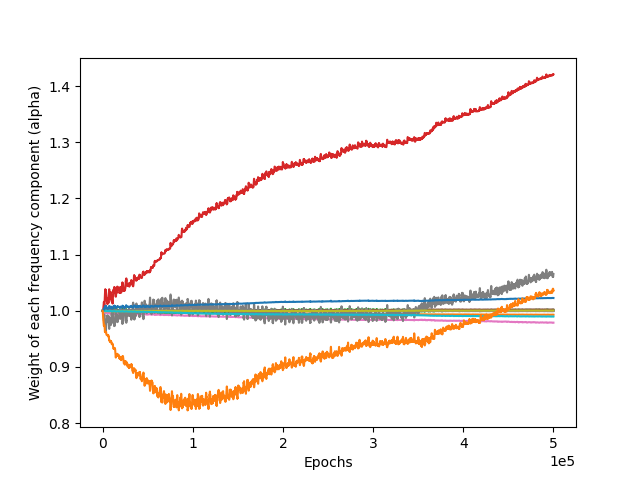

In [39]:
epochs = np.linspace(1, o.NSAMPLES+1, o.NSAMPLES+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Weight of each frequency component (alpha)")
FINAL_VALS = []
for i in range(len(o.ALPHA_)):
    plt.plot(epochs, o.ALPHA_[i], label=str(i+1))
    FINAL_VALS.append(o.ALPHA_[i][o.NEPOCHS-1])
plt.show()

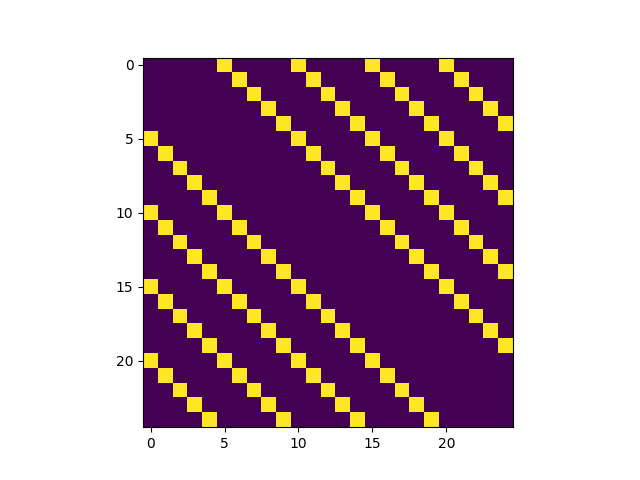

In [28]:
f = plt.figure()
plt.imshow(o.J) #plt.imshow(o.J, alpha=(1-o.P_VAL))
plt.show()

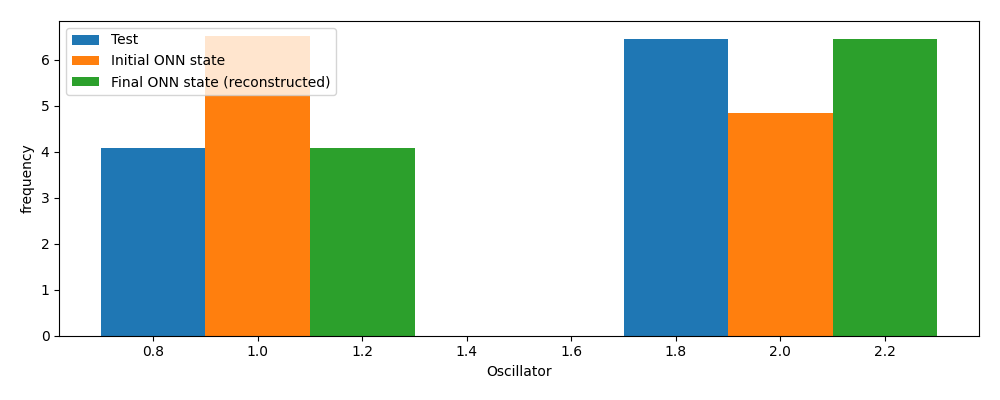

In [19]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.bar(np.linspace(1, o.N, o.N)-0.2, o.OMEGA_Test.flatten(), 0.2, label="Test")
plt.bar(np.linspace(1, o.N, o.N), o.OMEGA_[:,0].flatten(), 0.2, label="Initial ONN state")
plt.bar(np.linspace(1, o.N, o.N)+0.2, o.OMEGA_[:,o.NSAMPLES].flatten(), 0.2, label="Final ONN state (reconstructed)")
plt.legend()
plt.ylabel("frequency")
plt.xlabel("Oscillator")
f.tight_layout()
plt.show()

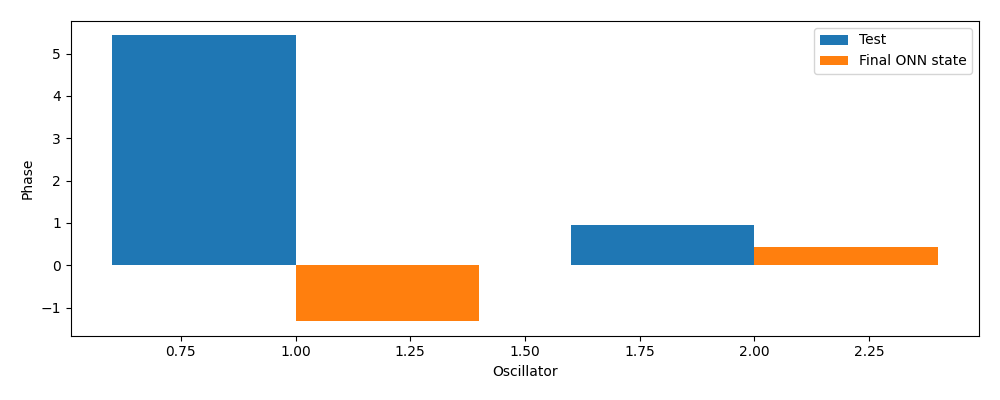

In [17]:
#Plot lateral weight instead
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.bar(np.linspace(1, o.N, o.N)-0.2, o.PHI_Test.flatten(), 0.4, label="Test")
plt.bar(np.linspace(1, o.N, o.N)+0.2, o.PHI.flatten(), 0.4, label="Final ONN state")
plt.legend()
plt.ylabel("Phase")
plt.xlabel("Oscillator")
f.tight_layout()
plt.show()

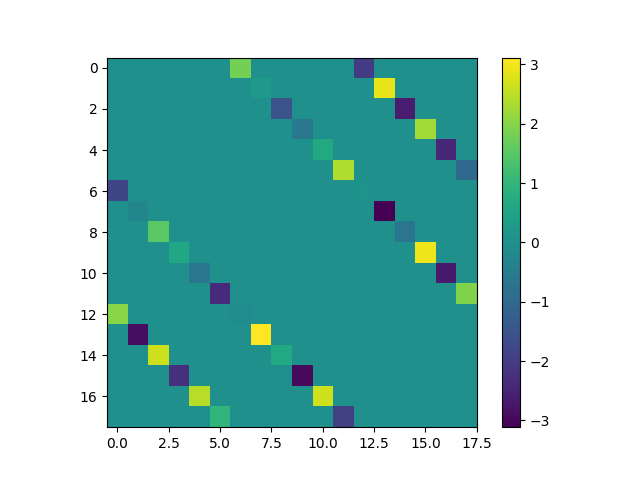

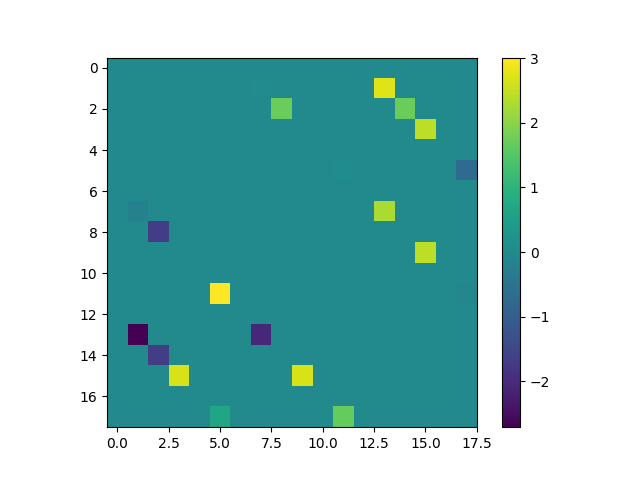

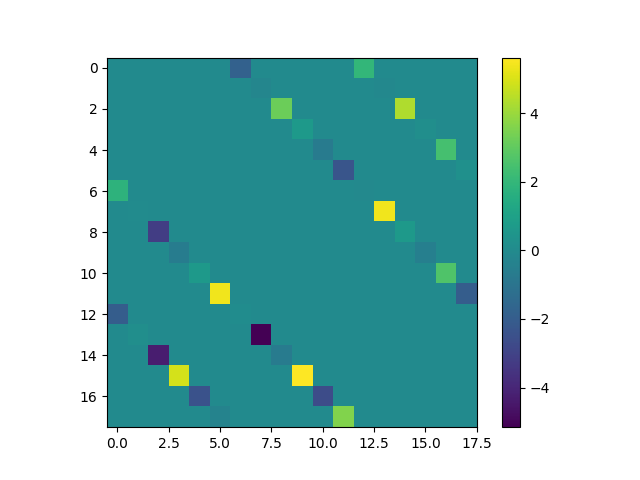

In [21]:
#TODO: This should be replaced with derived value of theta
#Check generate_signal function
#θ12= π*(n*ω01*ω02+2K*ω02-2p*ω01)+ φ1*ω02- φ02*ω01
#Use π normalization to extract useful information (φ1*ω02- φ02*ω01)%π
#Note: (φ1*ω02- φ02*ω01) might not necessarly be exactly extracted since it can be greater than π

#Binary connections
bin_conn = np.zeros([o.N, o.N])
bin_conn[o.J > 0] = 1

f = plt.figure()
norm_val = np.exp(1j*o.THETA_Test) ##Filter connected oscillator only
norm_val1 = np.angle(norm_val)
plt.imshow(norm_val1*bin_conn) #%(2*np.pi)
plt.colorbar()
plt.show()

f = plt.figure()
norm_val = np.exp(1j*o.THETA_[:,:,o.NEPOCHS]) ##Filter connected oscillator only
norm_val2 = np.angle(norm_val)
plt.imshow(norm_val2*bin_conn) #%(2*np.pi) ##Filter connected oscillator only
plt.colorbar()
plt.show()

f = plt.figure()
plt.imshow((norm_val2 - norm_val1)*bin_conn) #%(2*np.pi) ##Filter connected oscillator only
plt.colorbar()
plt.show()

In [13]:
debug

> /home/jupyter-avinash/ranjan_env/lib/python3.9/site-packages/pandas/core/internals/construction.py(422)_check_values_indices_shape_match()
    420         passed = values.shape
    421         implied = (len(index), len(columns))
--> 422         raise ValueError(f"Shape of passed values is {passed}, indices imply {implied}")
    423 
    424 



ipdb>  data.shape


*** NameError: name 'data' is not defined


ipdb>  data


*** NameError: name 'data' is not defined


ipdb>  values.shape


(696966, 30)


ipdb>  q


In [ ]:
#
#Amplitude can change during training
#Multiple oscillator in brain region